In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# read by default 1st sheet of an excel file
data = pd.read_excel('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data.xlsx')
data=pd.DataFrame(data)
data.head(10)

,phone model,phone size,phone color,claim,weeks_monday
0,alcatel axel,32gb,black,1,2022-01-24
1,alcatel axel,32gb,black,3,2022-11-14
2,alcatel axel,32gb,black,1,2022-11-21
3,alcatel axel,32gb,black,3,2022-11-28
4,alcatel axel,32gb,black,1,2022-12-12
5,alcatel smartflip 4052r,4gb,black,1,2022-07-04
6,alcatel smartflip 4052r,4gb,black,1,2022-07-25
7,alcatel smartflip 4052r,4gb,black,3,2022-08-01
8,alcatel smartflip 4052r,4gb,black,1,2022-08-08
9,alcatel smartflip 4052r,4gb,black,1,2022-08-15


In [8]:
#new_data=pd.read_csv('')

In [9]:
data=data[data['phone model'].str.startswith('apple')]

In [10]:
data.head(10)

,phone model,phone size,phone color,claim,weeks_monday
32,apple iphone 11,128gb,black,111,2021-06-28
33,apple iphone 11,128gb,black,319,2021-07-05
34,apple iphone 11,128gb,black,320,2021-07-12
35,apple iphone 11,128gb,black,305,2021-07-19
36,apple iphone 11,128gb,black,269,2021-07-26
37,apple iphone 11,128gb,black,301,2021-08-02
38,apple iphone 11,128gb,black,313,2021-08-09
39,apple iphone 11,128gb,black,354,2021-08-16
40,apple iphone 11,128gb,black,253,2021-08-23
41,apple iphone 11,128gb,black,223,2021-08-30


In [13]:
data['phone model']=data['phone model'].astype('category').cat.codes
data['phone size']=data['phone size'].astype('category').cat.codes
data['phone color']=data['phone color'].astype('category').cat.codes
data['weeks_monday']=data['weeks_monday'].astype('category').cat.codes
data.corr()

#data.head(20)

,phone model,phone size,phone color,claim,weeks_monday
phone model,1.000000,0.129150,-0.022444,-0.297598,-0.088515
phone size,0.129150,1.000000,0.046198,0.033657,-0.047705
phone color,-0.022444,0.046198,1.000000,-0.252817,-0.003433
claim,-0.297598,0.033657,-0.252817,1.000000,-0.001572
weeks_monday,-0.088515,-0.047705,-0.003433,-0.001572,1.000000


# Correlation between variables 

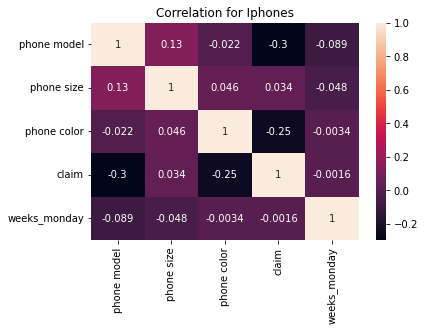

In [6]:
import seaborn as sns
ax = sns.heatmap(data.corr(), annot=True).set_title("Correlation for Iphones")
#ax.fig.suptitle('Correlation for Iphones')

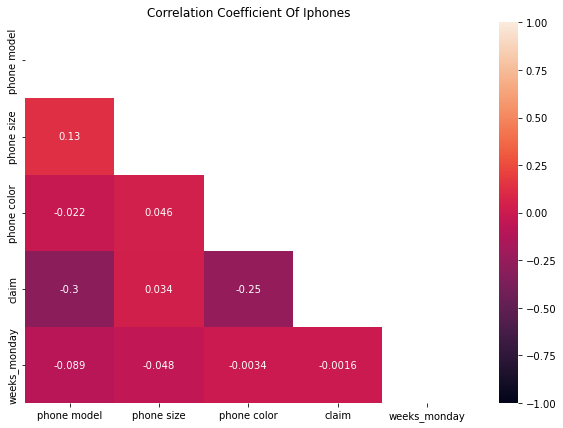

In [7]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# generate heatmap
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Iphones')
plt.show()

In [22]:
y = data['claim']
X = data.drop(['claim'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)


# Unsupervised methods 

## Variance Inflation Factor (VIF)

In [14]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [15]:
# features to consider removing
considered_features = ['phone model','phone size','phone color','claim','weeks_monday']

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,claim,1.196126
0,phone model,1.145025
2,phone color,1.086324
1,phone size,1.029571
4,weeks_monday,1.010108


# Supervised methods

## (1) Wrapper feature selection methods 

   > Forward Selection — SFS( ) from mlxtend

In [20]:
#Load needed libraries
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# load_boston() sklearn dataset to boston
#boston = load_boston()

#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.08856455126238072],0.088565,"(phone model,)"
2,"(0, 2)",[0.15593673783851636],0.155937,"(phone model, phone color)"
3,"(0, 1, 2)",[0.16327441192533887],0.163274,"(phone model, phone size, phone color)"
4,"(0, 1, 2, 3)",[0.1639675767736265],0.163968,"(phone model, phone size, phone color, weeks_m..."


## (2) Filter feature selection methods

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

          Specs         Score
0   phone model  19513.078789
3  weeks_monday   6623.726307
2   phone color   4008.539650
1    phone size   1738.716588


## (3) linear regression coefficients for feature importance

Feature: 0, Score: 15.15249
Feature: 1, Score: 89.00366
Feature: 2, Score: 85.16296
Feature: 3, Score: 65.82129


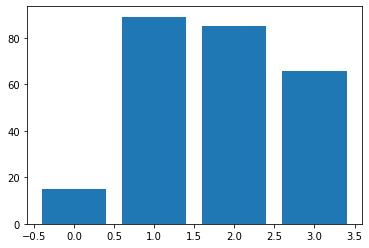

In [36]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=4, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()